## Daftar Isi
- [Overview to Machine Learning](#overview-machine-learning)
- [Pemodelan supervised learning](#teknik-teknik-pemodelan-machine-learning)
- [Gradient descent](#gradient-descent)
- [Bias & variance tradeoff](#bias-variance-tradeoff)


# Overview to Machine Learning

Dari gambar dibawah ini, ada yang bisa menebak / menambahkan apa perbedaan AI, machine learning, dan deep learning?  

![Hierarchy of AI](./assets/hierarchi.png)


![paradigma](./assets/paradigma.png)

Lalu gimana proses machine learning ini?

![proses-ML](./assets/proses.png)

## Terminologi Penting dalam Machine Learning

Sebelum lanjut ada beberapa istilah machine learning yang perlu dipahami terlebih dahulu:

1. **Data**  
   Berdasarkan representasi bentuknya, data dibedakan menjadi tiga jenis:  
   - **Tabular**: Data yang terorganisir dalam baris dan kolom, seperti tabel.  
   - **Gambar**: Data berupa piksel, seperti foto atau gambar digital.  
   - **Tidak Terstruktur**: Data tanpa format jelas, seperti teks atau audio.

2. **Fitur**  
   Karakteristik atau kolom dalam data yang digunakan sebagai input model.

3. **Model**  
   Persamaan matematis atau algoritma yang belajar dari data untuk membuat prediksi.

4. **Parameter**  
   Variabel dalam persamaan model yang disesuaikan selama pelatihan untuk meningkatkan akurasi prediksi.

5. **Loss Function (Fungsi Kerugian)**  
   Fungsi untuk mengukur seberapa jauh prediksi model dari nilai asli, dengan tujuan meminimalkan kesalahan.

6. **Learning Rate (Laju Belajar)**  
   Angka yang mengatur seberapa besar perubahan parameter pada setiap langkah gradient descent.

7. **Epoch**  
   Satu kali siklus ketika model melihat seluruh data pelatihan.

8. **Iterasi**  
   Satu langkah pembaruan parameter selama proses pelatihan.

9. **Hyperparameter**  
   Pengaturan yang ditentukan sebelum pelatihan dan tidak dipelajari oleh model, seperti learning rate.

10. **Metrik Evaluasi**  
   Ukuran yang digunakan untuk menilai kualitas prediksi model ML dibandingkan dengan data sebenarnya (ground truth)


>Jadi, Machine Learning dimulai dengan **pengumpulan data** dan **pemilihan model** berdasarkan karakteristik dari datanya. Model ini merupakan sebuah **persamaan matematis** yang memiliki variabel berupa **parameter**. Selama proses pelatihan, model belajar secara bertahap melalui proses **iterasi** dan **epoch**, dengan mengukur seberapa jauh prediksi model dari nilai asli menggunakan **loss function**. Sepanjang proses ini, model terus menyesuaikan nilai parameternya **ke arah hasil prediksi yang meminimalkan loss**. Untuk mengatur proses belajar ini, digunakan **hyperparameter** seperti learning rate, jumlah epoch, dan lainnya. Tujuan akhirnya adalah mencapai **evaluasi metrik** terbaik yang menunjukkan seberapa baik model memahami pola dalam data.


## Pemodelan Supervised Learning

![proses-ML](./assets/klasifikasi.png)

![proses-ML](./assets/regresi.png)

### Algoritma - Klasifikasi

### A. K-Nearest Neighbor (KNN)
Prinsip kerja KNN adalah mencari k-tetangga terdekat dari suatu data baru berdasarkan perhitungan jarak menggunakan metrik tertentu.

Setelah menemukan beberapa tetangga terdekat, dilakukan voting untuk menentukan kelas dengan jumlah kemunculan terbanyak di antara kelas-kelas tersebut.

Untuk dua titik $X = (x_1, x_2, \dots, x_n)$ dan $Y = (y_1, y_2, \dots, y_n)$, jarak $d(X, Y)$ dapat didefinisikan sebagai berikut:

**Euclidean Distance**

$$d(X, Y) = \sqrt{\sum_{i=1}^n (x_i - y_i)^2}$$

Jarak Euclidean mengukur panjang garis lurus antara dua titik dalam ruang.

**Manhattan Distance**

$$d(X, Y) = \sum_{i=1}^n |x_i - y_i|$$

Jarak Manhattan menghitung jumlah perbedaan absolut antar koordinat, seperti jarak tempuh di grid kota.

**Minkowski Distance**

$$d(X, Y) = \left( \sum_{i=1}^n |x_i - y_i|^p \right)^{\frac{1}{p}}$$

Jarak Minkowski adalah generalisasi dari Euclidean dan Manhattan, di mana:  
$p = 1$, jarak Manhattan.  
$p = 2$, jarak Euclidean.  

Perhatikan ilustrasi ini  
<img src="./assets/knn1.png" alt="knn" width="fit-content" height="fit-content">

Untuk k = 3, voting class terbanyak dimenangkan class B  
Untuk k = 6, voting class terbanyak dimenangkan class A


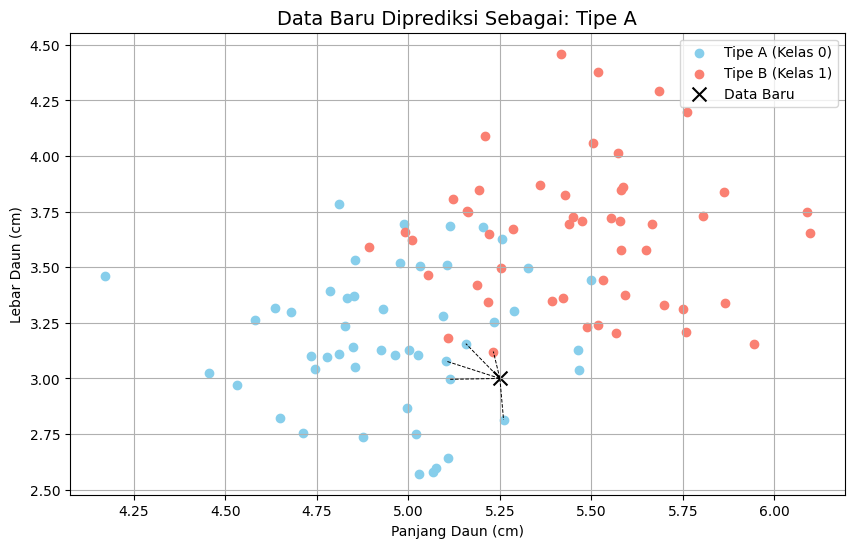

Jarak ke 5 tetangga terdekat:
1. Index: 94, Kelas: 1, Jarak: 0.122
2. Index: 34, Kelas: 0, Jarak: 0.136
3. Index: 25, Kelas: 0, Jarak: 0.167
4. Index: 0, Kelas: 0, Jarak: 0.182
5. Index: 17, Kelas: 0, Jarak: 0.186

Data baru dengan panjang 5.25 cm dan lebar 3.0 cm diprediksi sebagai: Tipe A


In [94]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(42)

X_A = np.random.multivariate_normal([5.0, 3.2], [[0.1, 0], [0, 0.1]], 50)
y_A = np.zeros(50)


X_B = np.random.multivariate_normal([5.5, 3.6], [[0.1, 0], [0, 0.1]], 50)
y_B = np.ones(50)

X = np.vstack((X_A, X_B))
y = np.concatenate((y_A, y_B))

data_baru = np.array([[5.25, 3.0]]) # ubah koordinat data baru

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

hasil_prediksi = knn.predict(data_baru)[0]
jarak, indeks_tetangga = knn.kneighbors(data_baru)


plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='skyblue', label='Tipe A (Kelas 0)')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='salmon', label='Tipe B (Kelas 1)')
plt.scatter(data_baru[0][0], data_baru[0][1], color='black', label='Data Baru', marker='x', s=100)


for i in indeks_tetangga[0]:
    plt.plot([data_baru[0][0], X[i][0]], [data_baru[0][1], X[i][1]], 'k--', linewidth=0.7)

label_pred = "Tipe A" if hasil_prediksi == 0 else "Tipe B"
plt.title(f"Data Baru Diprediksi Sebagai: {label_pred}", fontsize=14)
plt.xlabel("Panjang Daun (cm)")
plt.ylabel("Lebar Daun (cm)")
plt.legend()
plt.grid(True)
plt.show()

print("Jarak ke 5 tetangga terdekat:")
for i, idx in enumerate(indeks_tetangga[0]):
    print(f"{i+1}. Index: {idx}, Kelas: {int(y[idx])}, Jarak: {jarak[0][i]:.3f}")

print(f"\nData baru dengan panjang {data_baru[0][0]} cm dan lebar {data_baru[0][1]} cm diprediksi sebagai: {label_pred}")


Keunggulan KNN  adalah algoritma yang mudah dipahami dan tidak memerlukan proses pemodelan yang rumit. Namun, kelebihan ini juga membawa beberapa kelemahan yang perlu diperhatikan. Salah satunya, KNN dapat bekerja lambat ketika jumlah data mencapai ribuan, karena algoritma ini harus menghitung jarak ke setiap data satu per satu (time complexity `O(ND)`, `N` banyak data dan `D` dimensi)

Selain itu, KNN membutuhkan data yang seimbang agar tidak bias. Jika data tipe A jauh lebih banyak daripada tipe B, KNN cenderung memprediksi semua data sebagai tipe A.

### B.  Naive Bayes (NB)
Algoritma klasifikasi berbasis probabilitas yang menggunakan Teorema Bayes, yang menggambarkan probabilitas suatu kejadian, berdasarkan pengetahuan sebelumnya mengenai kondisi yang mungkin terkait 

Diaumsikan peluang ini mengikuti Gaussian (terdistribusi normal)

Algoritma ini "naive" (polos) karena mengasumsikan bahwa semua fitur dalam data saling independen satu sama lain—meskipun dalam kenyataannya asumsi ini sering tidak benar, tapi memudahkan perhitungan peluangnya

<img src="./assets/gaussianNB.png" alt="knn" width="fit-content" height="fit-content">

diasumsikan berdistribusi normal, maka peluang P(x_i|C) dapat dihitung dengan
$$
P(x_i|C) = \frac{1}{\sqrt{2\pi\sigma^2_C}} \exp\left(-\frac{(x_i - \mu_C)^2}{2\sigma^2_C}\right)
$$

**Teorema Bayes**

$$
P(C|X) = \frac{P(X|C) \cdot P(C)}{P(X)}
$$

- $P(C|X)$ adalah probabilitas kelas $C$ diberikan fitur $X$ (posterior probability),
- $P(X|C)$ adalah probabilitas fitur $X$ terjadi jika diketahui kelas $C$ (likelihood),
- $P(C)$ adalah probabilitas awal kelas $C$ (prior),
- $P(X)$ adalah probabilitas fitur $X$ secara umum (evidence).




Lalu, Naive Bayes memilih kelas dengan nilai posterior paling tinggi:

$$
\text{Nilai Posterior} = \text{Prior} \times \text{Likelihood}
$$

Untuk setiap kelas $C$, kita hitung:

$$
P(C|X) \propto P(C) \times P(x_1|C) \times P(x_2|C) \times \dots \times P(x_n|C)
$$

- **Prior**: seberapa sering kelas itu muncul dalam data.
- **Likelihood**: seberapa besar kemungkinan fitur-fitur tersebut muncul dalam kelas itu.

Asumsi independensi antar fitur membuat perhitungan menjadi jauh lebih sederhana, sehingga algoritma ini sangat cepat dan efisien untuk data besar.





**Keunggulan Naive Bayes**:
- Cepat dan efisien, cocok untuk dataset besar.
- Performa sangat baik meskipun asumsi independensi tidak selalu terpenuhi.
- Bekerja dengan baik pada data teks (spam detection, sentiment analysis).

**Kelemahan**:
- Asumsi fitur independen seringkali tidak realistis.
- Tidak menangani fitur numerik dengan baik jika tidak diasumsikan distribusi tertentu (seperti Gaussian).

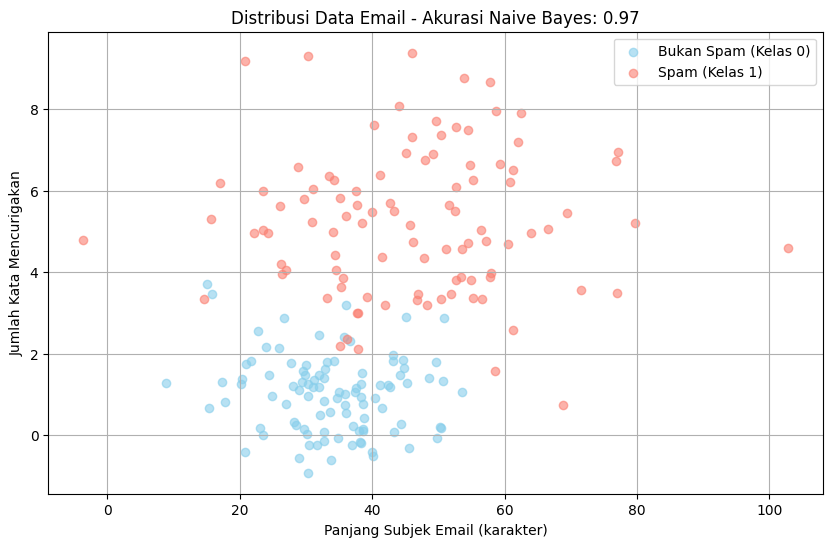

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

np.random.seed(42)

subject_len_0 = np.random.normal(35, 10, 100)  
suspicious_words_0 = np.random.normal(1, 1, 100)  

subject_len_1 = np.random.normal(45, 15, 100) 
suspicious_words_1 = np.random.normal(5, 2, 100)  

X_0 = np.column_stack((subject_len_0, suspicious_words_0))
X_1 = np.column_stack((subject_len_1, suspicious_words_1))
X = np.vstack((X_0, X_1))
y = np.array([0] * 100 + [1] * 100)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Visualisasi
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='skyblue', label='Bukan Spam (Kelas 0)', alpha=0.6)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='salmon', label='Spam (Kelas 1)', alpha=0.6)
plt.xlabel("Panjang Subjek Email (karakter)")
plt.ylabel("Jumlah Kata Mencurigakan")
plt.title(f"Distribusi Data Email - Akurasi Naive Bayes: {accuracy:.2f}")
plt.grid(True)
plt.legend()
plt.show()


## Algoritma - Regression

### A. Linear Regression

Linear Regression digunakan untuk memodelkan hubungan antara satu atau lebih fitur input (variabel independen) dan target numerik (variabel dependen) dengan asumsi bahwa hubungan tersebut bersifat linier.

Mengutip dari buku *"An Introduction to Statistical Learning"* (James et al., 2013):

> *“Linear regression is perhaps the most widely used statistical learning method. It has been used for decades in all fields of science.”*

Model ini mencari garis lurus terbaik yang meminimalkan selisih kuadrat antara nilai prediksi dan nilai aktual.

Untuk kasus **regresi linier sederhana** (dengan satu fitur) diberikan persamaan sebagai berikut:

$$
\hat{y} = \beta_0 + \beta_1 x
$$

Untuk **regresi linier berganda** (lebih dari satu fitur):

$$
\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_p x_p
$$

Di mana:
- $\hat{y}$ = nilai prediksi
- $x_i$ = fitur ke-$i$
- $\beta_0$ = intercept
- $\beta_i$ = koefisien regresi (slope)



Tujuan dari model regresi adalah mencari nilai $\beta_0, \beta_1, \dots, \beta_p$ yang **meminimalkan galat kuadrat rata-rata (MSE)**:

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$



<img src="./assets/linear-regression.png" alt="linear regression" width="fit-content" height="fit-content">

Garis regresi berusaha meminimalkan selisih antara titik data dan garis lurus yang dihasilkan model.



#### Kelebihan 
- Sangat sederhana dan mudah diinterpretasikan
- Cepat dihitung, efisien untuk dataset kecil hingga sedang
- Cocok untuk melihat pengaruh fitur terhadap target

#### Kelemahan 
- Tidak bekerja dengan baik jika hubungan tidak linier
- Sensitif terhadap *outlier*
- Rentan terhadap multikolinearitas jika banyak fitur berkorelasi tinggi

#### B. Polynomial Regression

Jika pada *Linear Regression* kita hanya menggunakan garis lurus untuk memodelkan hubungan antara fitur dan target, maka pada *Polynomial Regression* kita menggunakan kurva (misalnya kuadrat, kubik, dst). Model ini cocok untuk data yang punya pola melengkung.

Mengutip dari buku *An Introduction to Statistical Learning*:

> *"Polynomial regression extends the linear model by adding extra predictors, obtained by raising each of the original predictors to a power."*


Polynomial Regression bekerja dengan:
1. Menambahkan fitur baru yang merupakan pangkat dari fitur asli, misalnya $ x, x^2, x^3,$
2. Melatih model linear biasa (dengan regresi linear) menggunakan fitur-fitur tambahan ini.
3. Hasilnya adalah kurva yang bisa mengikuti pola naik-turun dalam data.


Model polynomial regresi orde-2 (kuadrat) bisa dituliskan sebagai:

$$
\hat{y} = \theta_0 + \theta_1 x + \theta_2 x^2
$$

Dengan kata lain, kita menyesuaikan kurva kuadrat ke data. Jika pakai orde-3:

$$
\hat{y} = \theta_0 + \theta_1 x + \theta_2 x^2 + \theta_3 x^3
$$


**Keunggulan** 
- Bisa menangkap pola non-linier dalam data
- Masih mudah dipahami dan diimplementasikan
- Fleksibel dengan berbagai derajat (orde)

**Kelemahan**
- Bisa **overfitting** jika derajat terlalu tinggi
- Sensitif terhadap *outlier*
- Tidak cocok untuk data berdimensi tinggi tanpa regularisasi

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


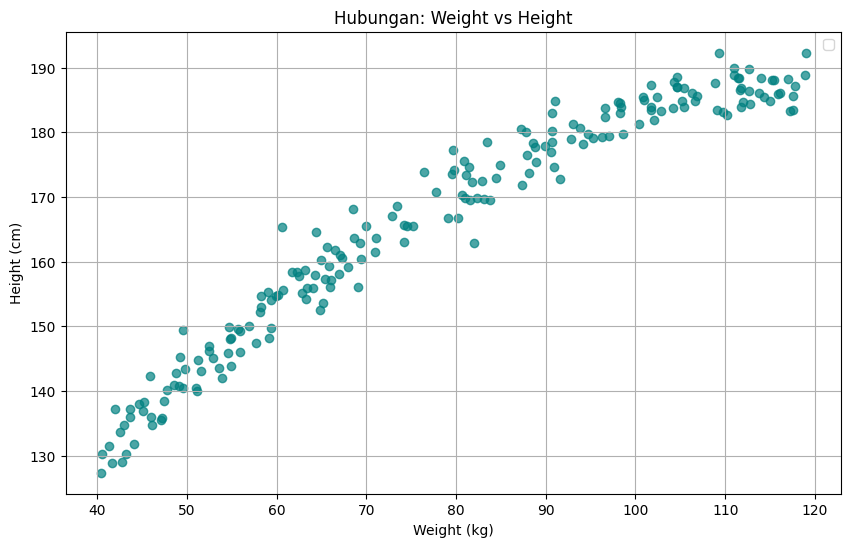

In [96]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.random.uniform(40, 120, 200)
X = np.sort(X)

y = 100 + 0.9 * X - 0.008 * (X - 70)**2 + np.random.normal(0, 3, size=X.shape)

# Convert to 2D for sklearn
X_2d = X.reshape(-1, 1)

# Plotting the generated data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.7, color='teal')
plt.title("Hubungan: Weight vs Height")
plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm)")
plt.grid(True)
plt.legend()
plt.show()


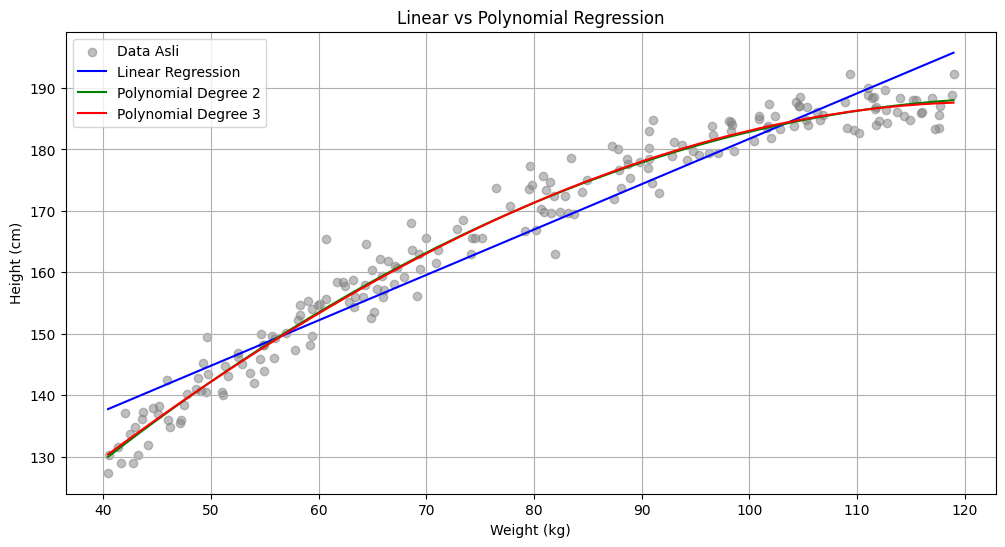

🔹 Linear Regression
MSE: 21.735417624391044

🔹 Polynomial Regression (Degree 2)
MSE: 8.388684337287213

🔹 Polynomial Regression (Degree 3)
MSE: 8.362674862662603


In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

lin_reg = LinearRegression()
lin_reg.fit(X_2d, y)
y_pred_lin = lin_reg.predict(X_2d)

poly2 = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly3 = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

poly2.fit(X_2d, y)
poly3.fit(X_2d, y)

y_pred_poly2 = poly2.predict(X_2d)
y_pred_poly3 = poly3.predict(X_2d)

plt.figure(figsize=(12, 6))
plt.scatter(X, y, label='Data Asli', color='gray', alpha=0.5)
plt.plot(X, y_pred_lin, label='Linear Regression', color='blue')
plt.plot(X, y_pred_poly2, label='Polynomial Degree 2', color='green')
plt.plot(X, y_pred_poly3, label='Polynomial Degree 3', color='red')
plt.title("Linear vs Polynomial Regression")
plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm)")
plt.legend()
plt.grid(True)
plt.show()

print("🔹 Linear Regression")
print("MSE:", mean_squared_error(y, y_pred_lin))

print("\n🔹 Polynomial Regression (Degree 2)")
print("MSE:", mean_squared_error(y, y_pred_poly2))

print("\n🔹 Polynomial Regression (Degree 3)")
print("MSE:", mean_squared_error(y, y_pred_poly3))


>Q: Saat mencari parameter optimal model melalui puluhan hingga ratusan iterasi, bagaimana kita mengetahui bahwa arah pembaruan parameter tersebut memang menuju ke solusi dengan cost minimum?

<img src="./assets/plug and chug.png" alt="Gradient Descent Illustration" width="600px" height="400px">

## Gradient Descent
Kalau diperhatikan betul betul, dari tadi di machine learning, kita sangat banyak membicarakan mengoptimalkan sesuatu. 
Gradient Descent adalah teknik optimisasi yang digunakan untuk menemukan parameter terbaik dalam model supervised learning. Teknik ini bekerja dengan cara **menuruni lereng fungsi loss (fungsi error)** untuk mencapai nilai minimum.

Mengutip dari buku *Deep Learning* oleh Ian Goodfellow et al.:

> *"The most common optimization algorithm in machine learning is stochastic gradient descent (SGD), which performs well even with large datasets by using approximations."*



Untuk memahami mekanisme Gradient Descent, kita dapat melihat salah satu fungsi error yang sering digunakan dalam regresi, yaitu **Sum of Squared Residuals (SSR)**:

$$
J(\theta) = \sum_{i=1}^{m} \left( y^{(i)} - (\theta_0 + \theta_1 x^{(i)}) \right)^2
$$

Keterangan:
- **Nilai Target**: $y^{(i)}$ = Nilai sebenarnya pada data ke-$i$
- **Prediksi Model**: $h(x^{(i)}) = \theta_0 + \theta_1 x^{(i)}$
- **Jumlah Data**: $m$ = Total jumlah data

Fungsi ini menghitung **jumlah kuadrat selisih** antara nilai prediksi dan nilai sebenarnya. Semakin kecil nilai $\theta$, semakin baik model melakukan prediksi terhadap data.

Untuk menemukan nilai parameter $\theta_0 $ dan $\theta_1 $ terbaik, Gradient Descent menggunakan rumus pembaruan berikut:

$$
\theta_j := \theta_j - \alpha \cdot \frac{\partial J(\theta)}{\partial \theta_j}
$$

Keterangan:
- **Learning Rate**: $\alpha$ = Ukuran langkah pada setiap iterasi
- **Gradien**: $\frac{\partial J(\theta)}{\partial \theta_j}$ = Turunan fungsi error terhadap parameter $\theta_j$
- **Indeks Parameter**: $j$ = Nilai 0 atau 1, mewakili parameter regresi linear

### Visualisasi Gradient Descent

Bayangkan fungsi error sebagai permukaan 3D. Gradient Descent akan mencari jalan tercepat ke bawah dengan mengikuti arah paling curam berdasarkan gradien.


<img src="./assets/gradient descent.png" alt="Gradient Descent Illustration" width="400px" height="400px">

<img src="./assets/big.png" alt="Gradient Descent Illustration" width="600px" height="400px">        


<img src="./assets/baby.png" alt="Gradient Descent Illustration" width="400px" height="400px">


NOTE: Semakin dekat kita dengan parameter optimal semakin dekat juga kemiringan mencapai titik 0.

<img src="./assets/close to 0.png" alt="Gradient Descent Illustration" width="400px" height="400px">

Untuk mencapai nilai yang paling dekat ke titik 0, step yang besar di awal dan step kecil ketika semakin dekat dengan kemiringan 0 diatur dengan step size atau dalam hyperparameter diatur dengan `learning rate`


## Contoh
Kita punya model regresi linier sederhana:
$$
\hat{y} = \text{intercept} + \text{slope} \times x
$$
Dalam kasus ini, **slope = 0.64** (diketahui), dan kita sedang mencari **intercept terbaik** menggunakan **Gradient Descent**.

| x    | y (aktual) |
|------|------------|
| 0.5  | 1.4        |
| 2.3  | 1.9        |
| 2.9  | 3.2        |

**Loss Function** (fungsi yang ingin kita minimalkan):
$$
\text{Loss} = \sum (y_i - \hat{y}_i)^2 = \sum (y_i - (\text{intercept} + 0.64 \cdot x_i))^2
$$

**Turunan terhadap intercept**:
$$
\frac{d}{d(\text{intercept})} \text{Loss} = \sum -2(y_i - (\text{intercept} + 0.64 \cdot x_i))
$$

Contoh
Misalnya kita mulai dari:
- intercept = 0
- learning rate = 0.1

Iterasi 1:

**Prediksi**:
- x = 0.5 → ŷ = 0 + 0.64×0.5 = **0.32**
- x = 2.3 → ŷ = 0 + 0.64×2.3 = **1.472**
- x = 2.9 → ŷ = 0 + 0.64×2.9 = **1.856**

**Error**:
- e₁ = 1.4 - 0.32 = 1.08
- e₂ = 1.9 - 1.472 = 0.428
- e₃ = 3.2 - 1.856 = 1.344

**Gradien**:
$$
\frac{d}{d(\text{intercept})} = -2(1.08 + 0.428 + 1.344) = -2(2.852) = -5.704
$$

**Update intercept**:
$$
\text{intercept}_{\text{baru}} = 0 - 0.1 \times (-5.704) = 0.5704
$$

 Iterasi 2:

Gunakan intercept = 0.5704

**Prediksi baru**:
- ŷ₁ = 0.5704 + 0.64×0.5 = 0.5704 + 0.32 = **0.8904**
- ŷ₂ = 0.5704 + 0.64×2.3 = 0.5704 + 1.472 = **2.0424**
- ŷ₃ = 0.5704 + 0.64×2.9 = 0.5704 + 1.856 = **2.4264**

**Error baru**:
- e₁ = 1.4 - 0.8904 = 0.5096
- e₂ = 1.9 - 2.0424 = -0.1424
- e₃ = 3.2 - 2.4264 = 0.7736

**Gradien baru**:
$$
-2(0.5096 - 0.1424 + 0.7736) = -2(1.1408) = -2.2816
$$

**Update intercept**:
$$
\text{intercept}_{\text{baru}} = 0.5704 - 0.1 \times (-2.2816) = 0.5704 + 0.22816 = 0.79856
$$


Dan seterusnya, sampai iterasi berakhir

In [98]:
import numpy as np
import plotly.graph_objects as go

X = np.array([1.0, 2.0, 3.0])
y = np.array([2.1, 3.9, 6.2])

def compute_ssr(intercepts, slopes):
 
    y_pred = intercepts.reshape(-1, 1) + slopes.reshape(-1, 1) * X
    return np.sum((y_pred - y)**2, axis=1)


intercept_vals = np.linspace(0, 2, 100)
slope_vals = np.linspace(0, 3, 100)
I, S = np.meshgrid(intercept_vals, slope_vals)
Z = compute_ssr(I.ravel(), S.ravel()).reshape(I.shape)

# Fungsi Gradient Descent
def gradient_descent(X, y, lr=0.05, iterations=15):
 
    intercept = 0.0
    slope = 0.0
    path = []
    n = len(X)
    
    for i in range(iterations):
        y_pred = intercept + slope * X
        errors = y_pred - y
        cost = np.sum(errors**2)
        path.append((intercept, slope, cost))
        
 
        d_intercept = (2/n) * np.sum(errors)
        d_slope = (2/n) * np.sum(errors * X)
        
    
        intercept -= lr * d_intercept
        slope -= lr * d_slope
    
  
    y_pred = intercept + slope * X
    cost = np.sum((y_pred - y)**2)
    path.append((intercept, slope, cost))
    return np.array(path)


In [99]:
path = gradient_descent(X, y, lr=0.05, iterations=15)
i_path, s_path, cost_path = path.T


fig = go.Figure()


fig.add_trace(go.Surface(
    x=intercept_vals, y=slope_vals, z=Z,
    colorscale='Viridis', opacity=0.7,
    showscale=True, name='SSR Surface'
))


fig.add_trace(go.Scatter3d(
    x=i_path, y=s_path, z=cost_path,
    mode='lines+markers',
    marker=dict(size=4, color='red'),
    line=dict(color='red', width=3),
    name='GD Path'
))


fig.add_trace(go.Scatter3d(
    x=[i_path[0]], y=[s_path[0]], z=[cost_path[0]],
    mode='markers', marker=dict(size=6, color='blue'),
    name='Start'
))
fig.add_trace(go.Scatter3d(
    x=[i_path[-1]], y=[s_path[-1]], z=[cost_path[-1]],
    mode='markers', marker=dict(size=6, color='green'),
    name='End'
))


fig.update_layout(
    title='Gradient Descent pada SSR untuk Model Linear Sederhana',
    scene=dict(
        xaxis_title='Intercept (θ₀)',
        yaxis_title='Slope (θ₁)',
        zaxis_title='Sum of Squared Residuals'
    ),
    width=800, height=600
)



print("Simulasi Gradient Descent (Slope dan Intercept)\n")
print(f"Learning Rate: {0.05}")
for i, (intercept, slope, cost) in enumerate(path):
    y_pred = intercept + slope * X
    errors = y - y_pred
    d_slope = (2/len(X)) * np.sum(errors * X)
    d_intercept = (2/len(X)) * np.sum(errors)
    
    print(f"Iterasi {i+1}")
    print(f"Slope: {slope:.5f}, Intercept: {intercept:.5f}")
    print(f"Prediksi: {y_pred}")
    print(f"Error: {errors}")
    print(f"Gradien Slope: {d_slope:.5f}, Gradien Intercept: {d_intercept:.5f}")
    print(f"Loss: {cost:.5f}")
    print("-" * 45)


final_intercept, final_slope, final_cost = path[-1]
print(f"Nilai Akhir: Intercept = {final_intercept:.5f}, Slope = {final_slope:.5f}, Loss = {final_cost:.5f}")
fig.show()

Simulasi Gradient Descent (Slope dan Intercept)

Learning Rate: 0.05
Iterasi 1
Slope: 0.00000, Intercept: 0.00000
Prediksi: [0. 0. 0.]
Error: [2.1 3.9 6.2]
Gradien Slope: 19.00000, Gradien Intercept: 8.13333
Loss: 58.06000
---------------------------------------------
Iterasi 2
Slope: 0.95000, Intercept: 0.40667
Prediksi: [1.35666667 2.30666667 3.25666667]
Error: [0.74333333 1.59333333 2.94333333]
Gradien Slope: 8.50667, Gradien Intercept: 3.52000
Loss: 11.75447
---------------------------------------------
Iterasi 3
Slope: 1.37533, Intercept: 0.58267
Prediksi: [1.958      3.33333333 4.70866667]
Error: [0.142      0.56666667 1.49133333]
Gradien Slope: 3.83289, Gradien Intercept: 1.46667
Loss: 2.56535
---------------------------------------------
Iterasi 4
Slope: 1.56698, Intercept: 0.65600
Prediksi: [2.22297778 3.78995556 5.35693333]
Error: [-0.12297778  0.11004444  0.84306667]
Gradien Slope: 1.75087, Gradien Intercept: 0.55342
Loss: 0.73799
--------------------------------------------

**Keunggulan:**
- Sederhana dan fleksibel, dapat digunakan di berbagai algoritma.
- Dapat digunakan pada data besar (dengan SGD/mini-batch).

**Kelemahan:**
- Sensitif terhadap learning rate.
- Lambat jika tidak disesuaikan dengan baik.

>Q: Apakah model bisa mengenali pola dan memprediksi data dengan sempurna?

### Bias dan Variance
Dalam supervised learning, kesalahan prediksi total dari suatu model dapat dibagi menjadi tiga komponen utama:

> **Total Error = Bias² + Variance + Irreducible Error**

**Bias**

Bias menggambarkan **seberapa jauh prediksi model dari nilai sebenarnya**.

- **Bias tinggi** berarti model membuat asumsi yang terlalu sederhana, sehingga gagal menangkap pola data dengan baik (*underfitting*).
- Bias umumnya terjadi ketika model terlalu sederhana untuk kompleksitas data.

**Contoh model dengan bias tinggi:**
- Regresi linear pada data yang bentuknya non-linear.
- Neural network dengan terlalu sedikit neuron atau layer.

 **Variance**

Variance menggambarkan **seberapa sensitif model terhadap perubahan data pelatihan**.

- **Variance tinggi** berarti model terlalu menyesuaikan diri dengan data pelatihan, bahkan terhadap noise (*overfitting*).
- Model dengan variance tinggi akan tampil sangat baik pada data pelatihan, tetapi buruk pada data uji.

**Contoh model dengan variance tinggi:**
- Decision tree dengan kedalaman tak terbatas.
- Neural network besar tanpa regularisasi.

**Irreducible Error**

Ini adalah kesalahan yang **tidak bisa dihindari** karena berasal dari:
- Noise alami dalam data,
- Variabel yang tidak terukur atau tidak tersedia.

### Trade-off Bias-Variance
Performa model bisa dianalogikan seperti ini:  

<img src="./assets/bias-variance.png" alt="linear regression" width="600px" height="400px">     



Tujuan utama dalam membangun model adalah mencapai **bias dan variance yang seimbang**, yaitu:  


<img src="./assets/variance dan bias.png" alt="linear regression" width="400px" height="400px">  

- Tidak terlalu sederhana (bias rendah),
- Tidak terlalu kompleks (variance rendah),
- Sehingga model dapat **menggeneralisasi dengan baik** ke data yang belum pernah dilihat.

## Selesai ^_^
---